In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# import scipy.stats as stats 
# import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

# DATA DESCRIPTION

In [71]:
# Read data
data = pd.read_csv("health.csv")
data.head()

,Unnamed: 0,Age,Income,Gender,Education,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure,Health_Status
0,0,50,3.093457e+06,Male,Bachelor's Degree,4.967887,16.632494,200.419036,70.917032,150.401537,125.568820,Excellent
1,1,44,5.545445e+06,Male,Bachelor's Degree,5.833649,13.255988,201.010046,70.669576,149.285349,125.603505,Fair
2,2,25,4.401808e+06,Male,Master's Degree,5.587946,11.144370,200.105258,67.464506,150.020695,127.093163,Excellent
3,3,41,4.606865e+06,Female,High School,6.271119,9.140268,199.648701,67.566598,150.360963,117.388100,Poor
4,4,24,6.956049e+06,Male,Bachelor's Degree,5.895226,9.775610,199.330152,79.601530,149.730525,114.163706,Fair


In [72]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2000 non-null   int64  
 1   Age                      2000 non-null   int64  
 2   Income                   2000 non-null   float64
 3   Gender                   2000 non-null   object 
 4   Education                2000 non-null   object 
 5   Stress_Level             2000 non-null   float64
 6   Exercise_Hours_Per_Week  2000 non-null   float64
 7   Cholesterol_Level        2000 non-null   float64
 8   Weight                   2000 non-null   float64
 9   Height                   2000 non-null   float64
 10  Blood_Pressure           2000 non-null   float64
 11  Health_Status            2000 non-null   object 
dtypes: float64(7), int64(2), object(3)
memory usage: 187.6+ KB


In [73]:
# Data description
data.describe()

,Unnamed: 0,Age,Income,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,39.417500,4.889928e+06,5.356912,9.951842,200.223191,70.234359,150.730565,119.682437
std,577.494589,11.560753,2.010795e+06,0.917069,4.909573,0.972594,10.174343,0.680443,11.201412
min,0.000000,20.000000,-1.088987e+06,2.528057,-4.499310,196.914948,32.581758,149.124594,0.000000
25%,499.750000,30.000000,3.580714e+06,4.737650,6.654951,199.581975,63.654894,150.240019,113.048602
50%,999.500000,39.000000,4.898901e+06,5.351795,9.927028,200.221522,70.392125,150.663619,119.937396
75%,1499.250000,49.250000,6.271595e+06,6.003014,13.232218,200.873647,76.894512,151.140489,126.608781
max,1999.000000,59.000000,1.222749e+07,8.581327,26.816358,203.162335,109.609562,153.870469,200.950000


In [74]:
numeric_data = data.select_dtypes(include=[int, float]) 

In [75]:
# Additional data information (mode). only return the first value of the mode
modus = data.mode().loc[0]
modus

Unnamed: 0                                 0
Age                                     53.0
Income                       -1088986.526405
Gender                                Female
Education                  Bachelor's Degree
Stress_Level                        2.528057
Exercise_Hours_Per_Week             -4.49931
Cholesterol_Level                 196.914948
Weight                             32.581758
Height                            149.124594
Blood_Pressure                           0.0
Health_Status                           Fair
Name: 0, dtype: object

In [76]:
# Additional data description (Variance)
numeric_data.var()

Unnamed: 0                 3.335000e+05
Age                        1.336510e+02
Income                     4.043297e+12
Stress_Level               8.410157e-01
Exercise_Hours_Per_Week    2.410391e+01
Cholesterol_Level          9.459387e-01
Weight                     1.035173e+02
Height                     4.630029e-01
Blood_Pressure             1.254716e+02
dtype: float64

In [77]:
# Additional data description (Range)
print(numeric_data.max() - numeric_data.min())

Unnamed: 0                 1.999000e+03
Age                        3.900000e+01
Income                     1.331648e+07
Stress_Level               6.053271e+00
Exercise_Hours_Per_Week    3.131567e+01
Cholesterol_Level          6.247387e+00
Weight                     7.702780e+01
Height                     4.745875e+00
Blood_Pressure             2.009500e+02
dtype: float64


In [78]:
# Additional data description (Interquartile Range)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
IQR

Unnamed: 0                 9.995000e+02
Age                        1.925000e+01
Income                     2.690882e+06
Stress_Level               1.265364e+00
Exercise_Hours_Per_Week    6.577267e+00
Cholesterol_Level          1.291672e+00
Weight                     1.323962e+01
Height                     9.004696e-01
Blood_Pressure             1.356018e+01
dtype: float64

In [79]:
# Additional data description (Skewness)
# The closer the value is to 0, the more symmetrical the data is
numeric_data.skew()

Unnamed: 0                 0.000000
Age                       -0.005292
Income                    -0.006351
Stress_Level              -0.012588
Exercise_Hours_Per_Week    0.061026
Cholesterol_Level         -0.072125
Weight                    -0.057605
Height                     0.657076
Blood_Pressure            -1.626737
dtype: float64

In [80]:
# Additional data description (Kurtosis)
# Describes the shape of the distribution, the higher the value, the more peaked the data is
numeric_data.kurtosis()

Unnamed: 0                 -1.200000
Age                        -1.203392
Income                     -0.031562
Stress_Level               -0.129817
Exercise_Hours_Per_Week     0.018318
Cholesterol_Level           0.005758
Weight                      0.124732
Height                      0.708111
Blood_Pressure             18.838494
dtype: float64

In [81]:
# Additional data description for non numeric data
string_data = data.select_dtypes(include=[object])

print("Unique Values:\n", string_data.nunique())
print("\nProportions:\n", string_data.value_counts(normalize=False))

Unique Values:
 Gender           2
Education        6
Health_Status    4
dtype: int64

Proportions:
 Gender  Education          Health_Status
Male    Bachelor's Degree  Good             134
Female  Bachelor's Degree  Excellent        129
Male    Bachelor's Degree  Excellent        126
                           Fair             124
Female  Bachelor's Degree  Poor             112
                           Fair             108
                           Good             106
Male    Bachelor's Degree  Poor             101
Female  Master's Degree    Fair              77
                           Poor              67
Male    Master's Degree    Poor              66
Female  Master's Degree    Excellent         62
Male    Master's Degree    Good              59
                           Fair              53
                           Excellent         50
Female  Master's Degree    Good              48
        PhD                Poor              39
        High School        Fair           

In [82]:
print (data["Education"].unique())

["Bachelor's Degree" "Master's Degree" 'High School' 'PhD' 'Other'
 'undefined']


# FINDING AND HANDLING OUTLIERS

### Disini, kita akan menganggap data yang berada diluar rentang Q1 - 1.5IQR dan Q3 + 1.5IQR adalah outliers, kita akan menggunakan bantuan boxplot untuk mencarinya, titik-titik yang berada diluar whiskers (garis yang keluar dari box) adalah outliers.

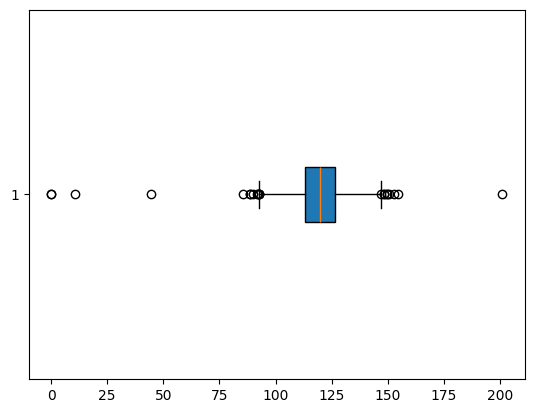

In [83]:
# Blood_Pressure
blood_pressure_data = data["Blood_Pressure"]
plt.boxplot(blood_pressure_data, vert=False, patch_artist=True) 
plt.show()

In [84]:
# Check for outliers
outliers_blood_pressure = blood_pressure_data[(blood_pressure_data < Q1["Blood_Pressure"] - 1.5 * IQR["Blood_Pressure"]) | (blood_pressure_data > Q3["Blood_Pressure"] + 1.5 * IQR["Blood_Pressure"])]
outliers_blood_pressure

43       90.027285
117      85.650116
192      91.953005
230     150.635116
249     148.131915
316       0.000000
323     148.158032
417      92.692620
526     149.568502
617      10.780000
715     149.463928
924      88.578819
1123    147.048143
1223     88.665138
1230    152.643476
1421     92.479926
1507     92.114951
1551      0.000000
1643     44.450000
1696    154.427656
1807     92.561036
1920    200.950000
Name: Blood_Pressure, dtype: float64

Disini terlihat bahwa kolom Blood Pressure juga memiliki outliers sehingga perlu diteliti lebih lanjut.

In [85]:
# Remove outliers
data = data.drop(outliers_blood_pressure.index)

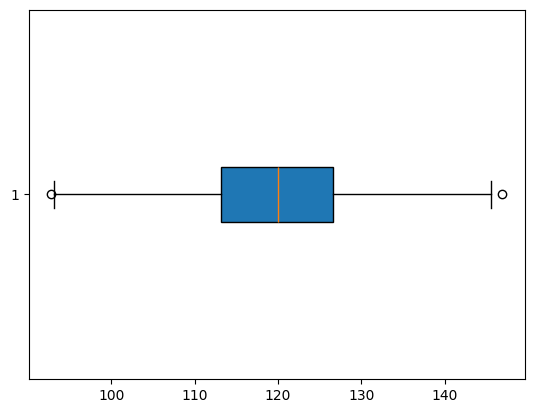

In [86]:
plt.boxplot(data["Blood_Pressure"], vert=False, patch_artist=True)
plt.show()

Berdasarkan data pada https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings, walaupun masih ada outliers, tetapi outliers tersebut masih dalam batas wajar sehingga tidak perlu ditangani lebih lanjut.

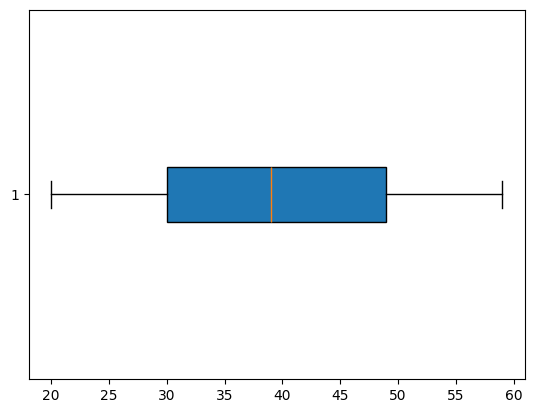

In [87]:
# Age
age_data = data["Age"]
plt.boxplot(age_data, vert=False, patch_artist=True) 
plt.show()

Karena tidak ada titik titik diluar whiskers, maka kolom age aman dari outliers

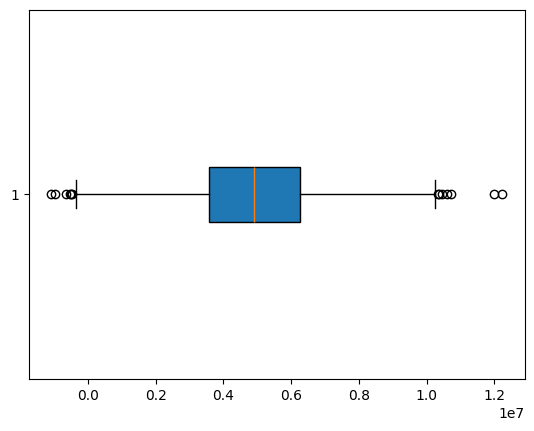

In [88]:
# Income
income_data = data["Income"]
plt.boxplot(income_data, vert=False, patch_artist=True) 
plt.show()

Disini terlihat kolom data income memiliki banyak outlier sehingga data tersebut perlu di cek lebih lanjut.

Dari boxplot tersebut, ada income yang bernilai negatif yang jelas hal ini tidak masuk akal sehingga untuk menangani ini, kita perlu membatasi income minimum adalah 0.

In [89]:
outliers_income = income_data[(income_data < Q1["Income"] - 1.5 * IQR["Income"]) | (income_data > Q3["Income"] + 1.5 * IQR["Income"])]
outliers_income

102    -5.235745e+05
453    -6.372663e+05
514    -4.944103e+05
579     1.044300e+07
673     1.060307e+07
835    -4.719274e+05
892    -9.677291e+05
1328    1.222749e+07
1460    1.036827e+07
1686    1.198891e+07
1697   -1.088987e+06
1947    1.073412e+07
1948    1.034308e+07
Name: Income, dtype: float64

In [90]:
# Tampilkan data yang memiliki nilai income negatif
outliers_income_negatif = outliers_income[outliers_income < 0]
outliers_income_negatif 

102    -5.235745e+05
453    -6.372663e+05
514    -4.944103e+05
835    -4.719274e+05
892    -9.677291e+05
1697   -1.088987e+06
Name: Income, dtype: float64

In [91]:
# Replace negative income with 0, use loc to avoid warning message
data.loc[data["Income"] < 0, "Income"] = 0

In [92]:
data[data["Income"] < 0]

,Unnamed: 0,Age,Income,Gender,Education,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure,Health_Status


{'whiskers': [<matplotlib.lines.Line2D at 0x21a90229f10>,
 'caps': [<matplotlib.lines.Line2D at 0x21a9273ec00>,
 'boxes': [<matplotlib.patches.PathPatch at 0x21a9022bd10>],
 'medians': [<matplotlib.lines.Line2D at 0x21a9273c680>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a9273cfe0>],
 'means': []}

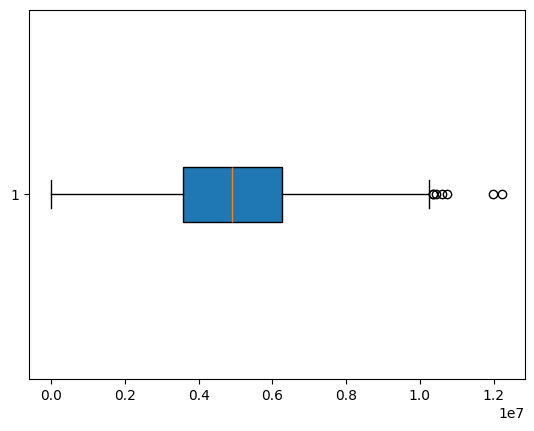

In [93]:
plt.boxplot(income_data, vert=False, patch_artist=True)

Disini, income yang negatif sudah di set ke 0. Untuk income yang melebihi Q3 + 1.5IQR, hal tersebut mungkin saja terjadi sehingga tidak diperlukan perubahan untuk outliers yang bernilai > Q3 +1.5IQR.

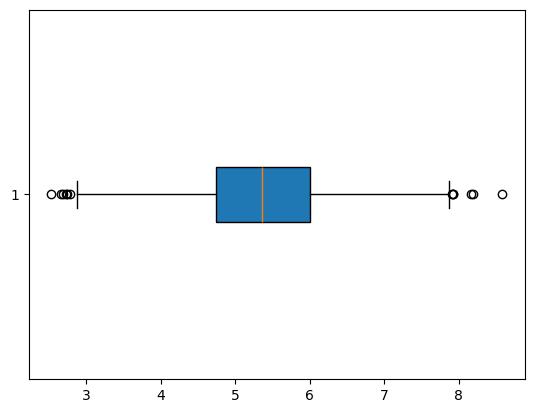

In [94]:
# Stress level
stress_level_data = data["Stress_Level"]
plt.boxplot(stress_level_data, vert=False, patch_artist=True) 
plt.show()

Disini terlihat bahwa kolom stress level juga memiliki outliers sehingga perlu diteliti lebih lanjut.

In [95]:
outliers_stress_level = stress_level_data[(stress_level_data < Q1["Stress_Level"] - 1.5 * IQR["Stress_Level"]) | (stress_level_data > Q3["Stress_Level"] + 1.5 * IQR["Stress_Level"])]
outliers_stress_level

13      2.528057
170     8.191571
201     7.908383
240     2.661764
306     7.916607
393     7.927514
1089    2.782488
1196    8.168885
1210    2.728318
1433    8.581327
1519    2.745202
1640    2.686308
Name: Stress_Level, dtype: float64

Dengan asumsi bahwa stress level berada pada interval 1-10, maka data diatas masih masuk dalam kategori wajar sehingga tidak perlu ditangani lebih lanjut

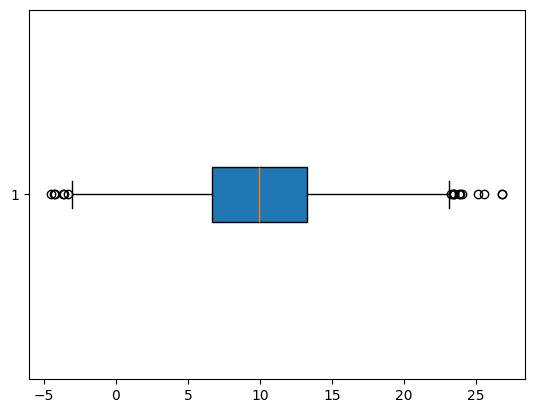

In [96]:
# Exercise_Hours_Per_Week
exercise_hours_per_week_data = data["Exercise_Hours_Per_Week"]
plt.boxplot(exercise_hours_per_week_data, vert=False, patch_artist=True) 
plt.show()

Disini terlihat bahwa kolom Exercise Hours Per Week juga memiliki outliers sehingga perlu diteliti lebih lanjut.

In [97]:
# Check outliers
outliers_exercise = exercise_hours_per_week_data[(exercise_hours_per_week_data < Q1["Exercise_Hours_Per_Week"] - 1.5 * IQR["Exercise_Hours_Per_Week"]) | (exercise_hours_per_week_data > Q3["Exercise_Hours_Per_Week"] + 1.5 * IQR["Exercise_Hours_Per_Week"])]
outliers_exercise

48      24.033132
180     25.530543
278     -3.632656
330     -4.499310
452     23.463102
479     23.506893
580     -4.247733
644     23.269785
893     23.103693
1056    -3.645436
1147    23.883280
1284    26.816358
1599    -3.343693
1677    26.795926
1706    -4.298969
1784    23.432592
1788    25.146327
1853    23.794101
Name: Exercise_Hours_Per_Week, dtype: float64

In [98]:
# Check for negative values
negatif_exercise = exercise_hours_per_week_data[exercise_hours_per_week_data < 0]
negatif_exercise

35     -1.927087
53     -0.432964
75     -0.309098
101    -0.950271
162    -3.063739
193    -1.552585
235    -0.064111
258    -0.273152
264    -0.392170
273    -0.764312
276    -0.352699
278    -3.632656
291    -0.342537
328    -2.077250
330    -4.499310
339    -0.757945
366    -1.905777
580    -4.247733
660    -1.218878
742    -0.490524
1056   -3.645436
1068   -0.950923
1143   -1.271801
1176   -1.300274
1207   -1.442528
1211   -0.942582
1250   -2.636253
1293   -2.501845
1319   -0.141838
1544   -1.669836
1545   -0.379740
1599   -3.343693
1623   -2.688027
1671   -1.207635
1699   -0.804646
1706   -4.298969
1708   -0.325989
1760   -1.326430
1835   -2.636172
1992   -0.954750
1993   -2.087057
Name: Exercise_Hours_Per_Week, dtype: float64

In [99]:
# Change negative values to 0
data.loc[data["Exercise_Hours_Per_Week"] < 0, "Exercise_Hours_Per_Week"] = 0

In [100]:
data[data["Exercise_Hours_Per_Week"] < 0]

,Unnamed: 0,Age,Income,Gender,Education,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure,Health_Status


{'whiskers': [<matplotlib.lines.Line2D at 0x21a92597ce0>,
 'caps': [<matplotlib.lines.Line2D at 0x21a938fa1e0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x21a924ce690>],
 'medians': [<matplotlib.lines.Line2D at 0x21a938fbd70>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a9392c8c0>],
 'means': []}

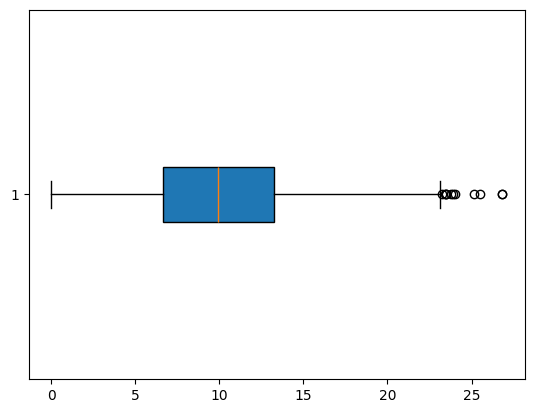

In [101]:
plt.boxplot(exercise_hours_per_week_data, vert=False, patch_artist=True)

Disini, exercise hour per week yang negatif sudah di set ke 0. Untuk exercise hour per week yang melebihi Q3 + 1.5IQR, hal tersebut mungkin saja terjadi (masih masuk akal dalam seminggu) sehingga tidak diperlukan perubahan untuk outliers yang bernilai > Q3 +1.5IQR.

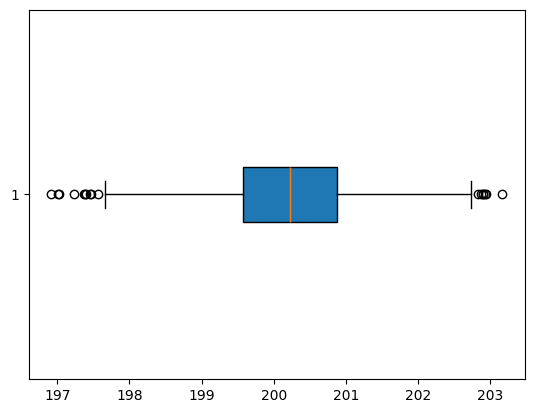

In [102]:
# Cholesterol_Level
cholesterol_level_data = data["Cholesterol_Level"]
plt.boxplot(cholesterol_level_data, vert=False, patch_artist=True) 
plt.show()

Disini terlihat bahwa kolom Cholesterol level juga memiliki outliers sehingga perlu diteliti lebih lanjut. Namun, berdasarkan artikel pada https://www.healthline.com/health/high-cholesterol/levels-by-age#:~:text=Recommended%20total%20cholesterol%20levels%20are%20under%20200%20milligrams,of%20the%20cholesterol%20that%20it%20needs%20to%20function, level normal kolesterol adalah < 200 sehingga semua outlier diatas masih bisa dibilang data yang wajar.

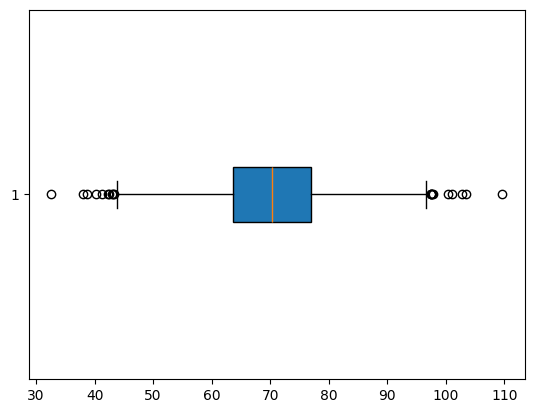

In [103]:
# Weight
weight_data = data["Weight"]
plt.boxplot(weight_data, vert=False, patch_artist=True) 
plt.show()

Disini terlihat bahwa kolom Weight juga memiliki outliers sehingga perlu diteliti lebih lanjut.

In [104]:
outliers_weight = weight_data[(weight_data < Q1["Weight"] - 1.5 * IQR["Weight"]) | (weight_data > Q3["Weight"] + 1.5 * IQR["Weight"])]
outliers_weight

236     109.609562
305     103.488182
397      43.210014
506     102.708167
711     100.333305
747      40.210278
779      42.428906
818      42.271182
887      97.577311
986      43.381050
1036     32.581758
1053     97.444777
1481     38.022481
1555     38.666547
1595     97.456489
1626     97.474679
1649    100.976404
1904     41.274350
1948     97.861295
1991     42.931331
Name: Weight, dtype: float64

Karena berat badan pada bagian outlier masih merupakan berat badan yang mungkin bagi manusia, maka outliers tersebut tidak perlu ditangani lebih lanjut.

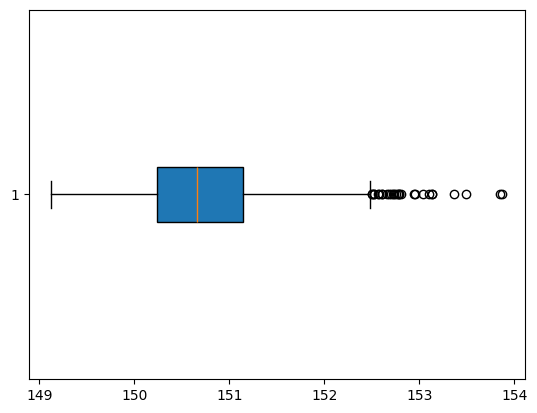

In [105]:
# Height
height_data = data["Height"]
plt.boxplot(height_data, vert=False, patch_artist=True) 
plt.show()

Disini terlihat bahwa kolom Height juga memiliki outliers sehingga perlu diteliti lebih lanjut. Namun, outliers pada data tersebut masih terbilang wajar untuk menyatakan tinggi manuasia sehingga tidak diperlukan penanganan lebih lanjut.

## 1. Blood Pressure

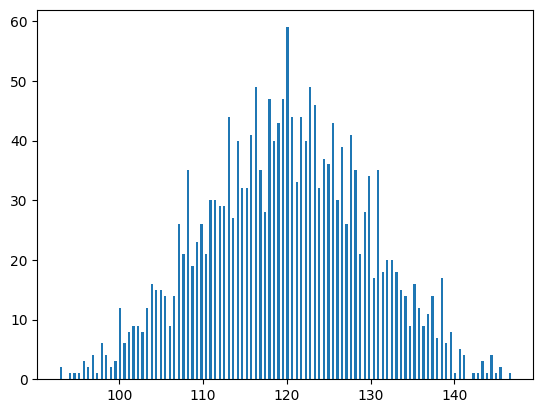

In [106]:
plt.hist(data["Blood_Pressure"], bins=100, rwidth=0.5)
plt.show()

### Data is normally distributed

## 2. Gender 

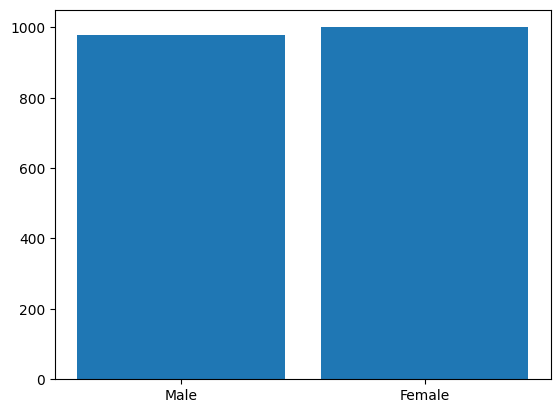

In [107]:
# Gender distribution
gender_data = data['Gender']
counts, bins, patches = plt.hist(gender_data, bins=2, rwidth=0.85)

# Menentukan label untuk setiap bin
bin_centers = 0.5 * np.diff(bins) + bins[:-1] # titik tengah bin
labels = ['Male', 'Female'] # label untuk setiap bin

plt.xticks(bin_centers, labels)  # menetapkan label pada titik tengah bin
plt.show()

## 3. Education 

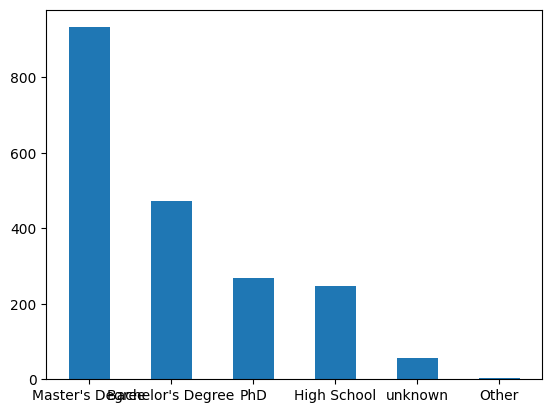

In [108]:
# Education distribution
education_data = data['Education']
counts, bins, patches = plt.hist(education_data, bins=6, rwidth=0.5)

# Menentukan label untuk setiap bin
bin_centers = 0.5 * np.diff(bins) + bins[:-1]  # titik tengah bin
labels = ['Master\'s Degree','Bachelor\'s Degree', 'PhD', 'High School', 'unknown', 'Other']  # label untuk setiap bin

plt.xticks(bin_centers, labels)  # menetapkan label pada titik tengah bin

plt.show()

## 4. Age

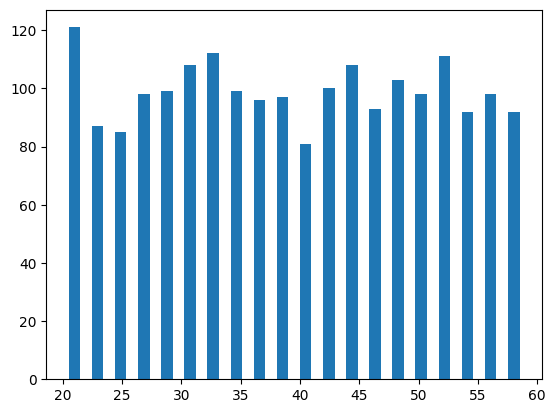

In [109]:
# Age distribution
plt.hist(data["Age"], bins=20, rwidth=0.5)
plt.show()

## 5. Income

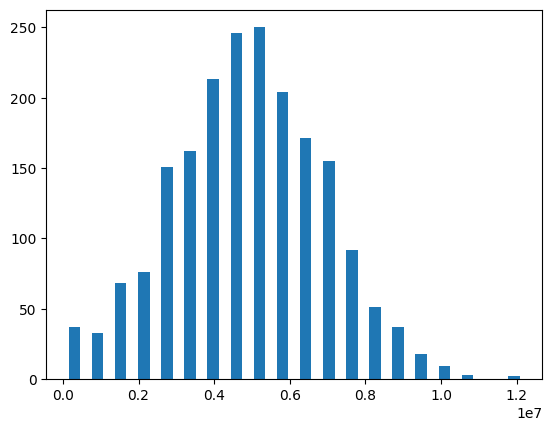

In [110]:
# Income distribution
plt.hist(data["Income"], bins=20, rwidth=0.5)
plt.show()

## 6. Stress Level

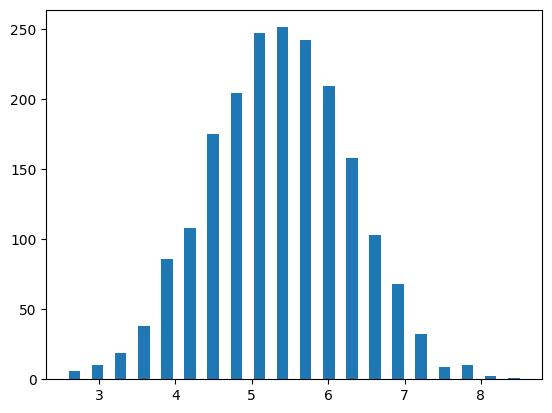

In [111]:
# Stress level distribution
plt.hist(data["Stress_Level"], bins=20, rwidth=0.5)
plt.show()  

## 7. Exercise Hours per Week

(array([  3.,   6.,   6.,  25.,  37.,  58., 108., 170., 177., 243., 252.,
        249., 219., 161., 104.,  79.,  39.,  29.,   7.,   6.]),
 array([196.91494771, 197.22731707, 197.53968644, 197.8520558 ,
        198.16442517, 198.47679453, 198.78916389, 199.10153326,
        199.41390262, 199.72627199, 200.03864135, 200.35101072,
        200.66338008, 200.97574945, 201.28811881, 201.60048818,
        201.91285754, 202.2252269 , 202.53759627, 202.84996563,
        203.162335  ]),
 <BarContainer object of 20 artists>)

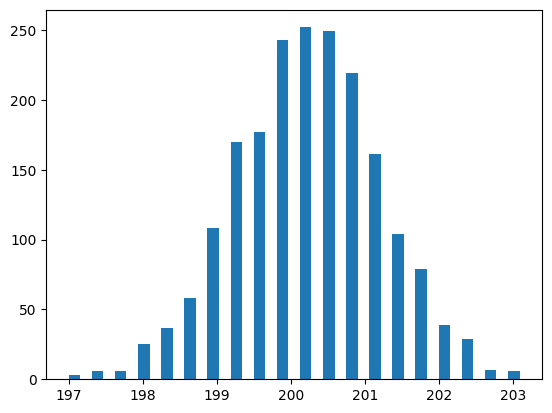

In [112]:
# Cholesterol level distribution
plt.hist(cholesterol_level_data, bins=20, rwidth=0.5)

## 8. Weight

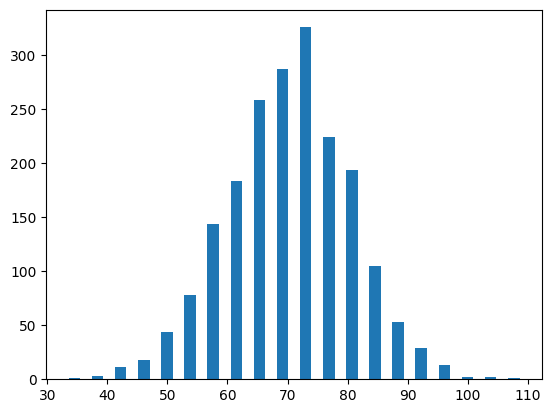

In [113]:
# Weight distribution
plt.hist(weight_data, bins=20, rwidth=0.5)
plt.show()

## 9. Height

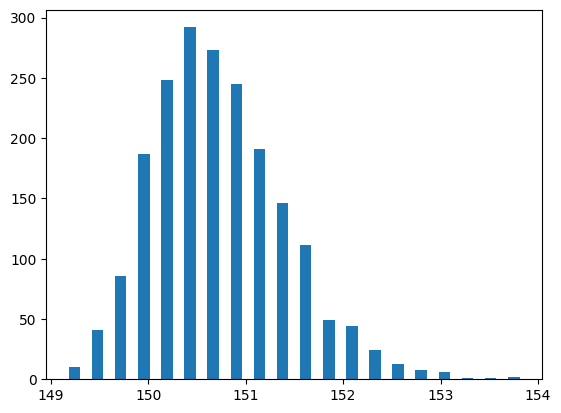

In [114]:
# Height distribution
plt.hist(height_data, bins=20, rwidth=0.5)
plt.show()

# One-Sample Hypotesis


#### 1. Lembaga riset saat ini sedang mempertanyakan data berat badan individu yang disimpan untuk kepentingan riset lanjutan. Identifikasilah apakah rata-rata berat badan pasien diatas 65 kg?


In [115]:
# H0 : Mean of weight <= 65
# H1 : Mean of weight > 65 
# Significance level = 0.05
# One-tailed test (greater than)

# Find sample (take 100 samples), set random_state to 1 to get the same sample
weight_sample = data["Weight"].sample(n=100, random_state=1)

weight_sample_mean = weight_sample.mean()

# Find Z for sample
weight_calculated_z_value = (weight_sample_mean - data["Weight"].mean()) / data["Weight"].std() / np.sqrt(100)
weight_calculated_z_value  


-0.014116735786161494

In [116]:
# Find Z for population
# Significance level = 0.05, Significance level/2 = 0.025
weight_z_value = norm.ppf(0.95)
weight_z_value.round(2)

# Since this is a one-tailed test, we only need to check the right side

1.64

In [117]:
# Compare Z value
if weight_calculated_z_value > weight_z_value:
    print("Reject H0")
else:
    print("Fail to reject H0")

Fail to reject H0


Karena H0 di gagal ditolak, maka berat badan rata-rata <= 65

#### 2. Tekanan darah yang normal berada pada rentang 120 mmHg. Lembaga riset perlu untuk memastikan apakah data individu yang diukur cukup normal. Periksalah apakah rata-rata tekanan darah sistole bernilai 120 mmHg?

In [118]:
# H0 : Mean of blood pressure != 120
# H1 : Mean of blood pressure = 120
# Significance level = 0.05
# Two-tailed test


# Find Z for sample, take 100 samples, set random_state to 1 to get the same sample
blodd_pressure_sample = data["Blood_Pressure"].sample(n=100, random_state=1)
blood_pressure_sample_mean = blodd_pressure_sample.mean()

# Find Z for sample
blood_pressure_calculated_z_value = (blood_pressure_sample_mean - data["Blood_Pressure"].mean()) / data["Blood_Pressure"].std() / np.sqrt(100)
blood_pressure_calculated_z_value  


-0.008769211916170092

In [134]:
# Find Z for population
# Significance level = 0.05, Significance level/2 = 0.025
blood_pressure_z_value = norm.ppf(0.975)
blood_pressure_z_value.round(3)

1.96

In [120]:
# Since this is a two-tailed test, we need to check both sides
if blood_pressure_calculated_z_value > blood_pressure_z_value or blood_pressure_calculated_z_value < -blood_pressure_z_value:
    print("Reject H0")
else:
    print("Fail to reject H0")

Fail to reject H0


Karena H0 (average blood pressure != 120) gagal ditolak, maka average blood pressure tidak sama dengan 120 

#### 3. Periksalah apakah data 200 individu pertama pengujian (baris teratas) memiliki rata-rata waktu olahraga per minggu tidak sama dengan 15 jam?

In [130]:
# H0 : Mean of exercise hour per week = 15
# H1 : Mean of exercise hour per week != 15
# Significance level = 0.05
# Two-tailed test


# Find Z for sample, take 200 samples, take the first 200 data
exercise_hours_per_week_sample = data["Exercise_Hours_Per_Week"].head(200)
exercise_hours_per_week_sample_mean = exercise_hours_per_week_sample.mean()

# Find Z for sample
exercise_hours_per_week_calculated_z_value = (exercise_hours_per_week_sample_mean - data["Exercise_Hours_Per_Week"].mean()) / data["Exercise_Hours_Per_Week"].std() / np.sqrt(200)
exercise_hours_per_week_calculated_z_value  


-0.0012108231452485842

In [133]:
# Find Z for population
# Significance level = 0.05, Significance level/2 = 0.025
exercise_hours_per_week_z_value = norm.ppf(0.975)
exercise_hours_per_week_z_value.round(3)

1.96

In [136]:
# Since this is a two-tailed test, we need to check both sides
if exercise_hours_per_week_calculated_z_value > exercise_hours_per_week_z_value or exercise_hours_per_week_calculated_z_value < -exercise_hours_per_week_z_value:
    print("Reject H0")
else:
    print("Fail to reject H0")

Fail to reject H0


Karena gagal menolak H0, maka H0 (average exercise hour per week = 15) benar.

#### 4. Apakah penduduk dengan pendapatan yang lebih besar dari Rp 7.500.000,00 tidak sama dengan 30% dari data keseluruhan individu? 

In [158]:
# H0 : people with income > 7500000 is equal to 30% of the population
# H1 : people with income > 7500000 is not equal to 30% of the population
# Significance level = 0.05
# Two-tailed test


# Find the sample mean, take the people with income > 7500000
income_more_than_75 = data[data["Income"] > 7500000]

# Find the p hat
p_hat = len(income_more_than_75) / len(data)
p = 0.3

-0.2064711830131446

In [167]:
# Calculate the standard error under H0
SE = np.sqrt(p * (1 - p) / len(data))

# Calculate the Z statistic
Z = (p_hat - p) / SE

nan

In [161]:
# Calculate the p-value
p_value = 2 * (1 - norm.cdf(abs(Z)))  # two-tailed test

print(f"Z statistic: {Z}")
print(f"p-value: {p_value}")

Z statistic: -20.038395423663218
p-value: 0.0


In [168]:
# Make a decision
if p_value < 0.05:
    print("Reject H0.")
else:
    print("Fail to reject H0.")

Reject H0.
